In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from uplift.datasets import simulate_randomized_trial

### Continuous outcome

The idea behind the data generation procedure is that the data (X, W, Y) is generated according to the following non-parameteric model:

X ~ P(X)

W ~ P(W|X) where W is in {0,1}. In randomized trial, P(W) = P(W | X)

Y = b(X) + (W-0.5)*tau(X) + epsilon, E[epsilon | X, W] = 0

X - features, W - treatment, Y - observed outcome, tau(X) - treatment effect

The specific simulation procedure that we will employ was proposed in:

Xinkun Nie and Stefan Wager. Quasi-Oracle Estimation of Heterogeneous Treatment Effects. Biometrika, forthcoming https://arxiv.org/pdf/1712.04912.pdf

We employ the 'Setup B' of the simulation, which corresponds to a randomized trial.

Implemented by the authors: https://github.com/xnie/rlearner/blob/master/experiments_for_paper/run_simu.R#L35

Also implemented in CausalML package: https://github.com/uber/causalml/blob/master/causalml/dataset/regression.py#L80

In [6]:
# generates a dataset with 1000 rows with 6 features
# only the first 5 features are correlated with the outcome, only the first two are correlated with the treatment effect
data = simulate_randomized_trial(n=1000, p=6, sigma=1.0)

In [7]:
data.head()

,treatment,outcome,propensity,expected_outcome,actual_cate,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6
0,1,3.630046,0.5,3.040510,2.360262,0.367036,1.846748,0.826726,0.064948,-1.497542,-0.101751
1,1,0.277195,0.5,0.452328,1.546230,1.040830,-0.419084,-0.169418,-0.650527,-0.424516,-1.294933
2,0,1.284992,0.5,3.773414,0.858075,0.408749,-0.566944,-0.871532,2.207319,1.566095,-0.534122
3,0,-0.027620,0.5,0.052507,0.803872,0.127039,-0.032900,-0.041632,-0.956818,-0.580077,0.582519
4,0,-0.624158,0.5,1.546466,1.596893,0.784374,0.226002,0.536090,-0.041370,-0.107941,1.955882


In [8]:
data['treatment'].value_counts()

0    534
1    466
Name: treatment, dtype: int64

Only the first 5 features should be correlated with the outcome:

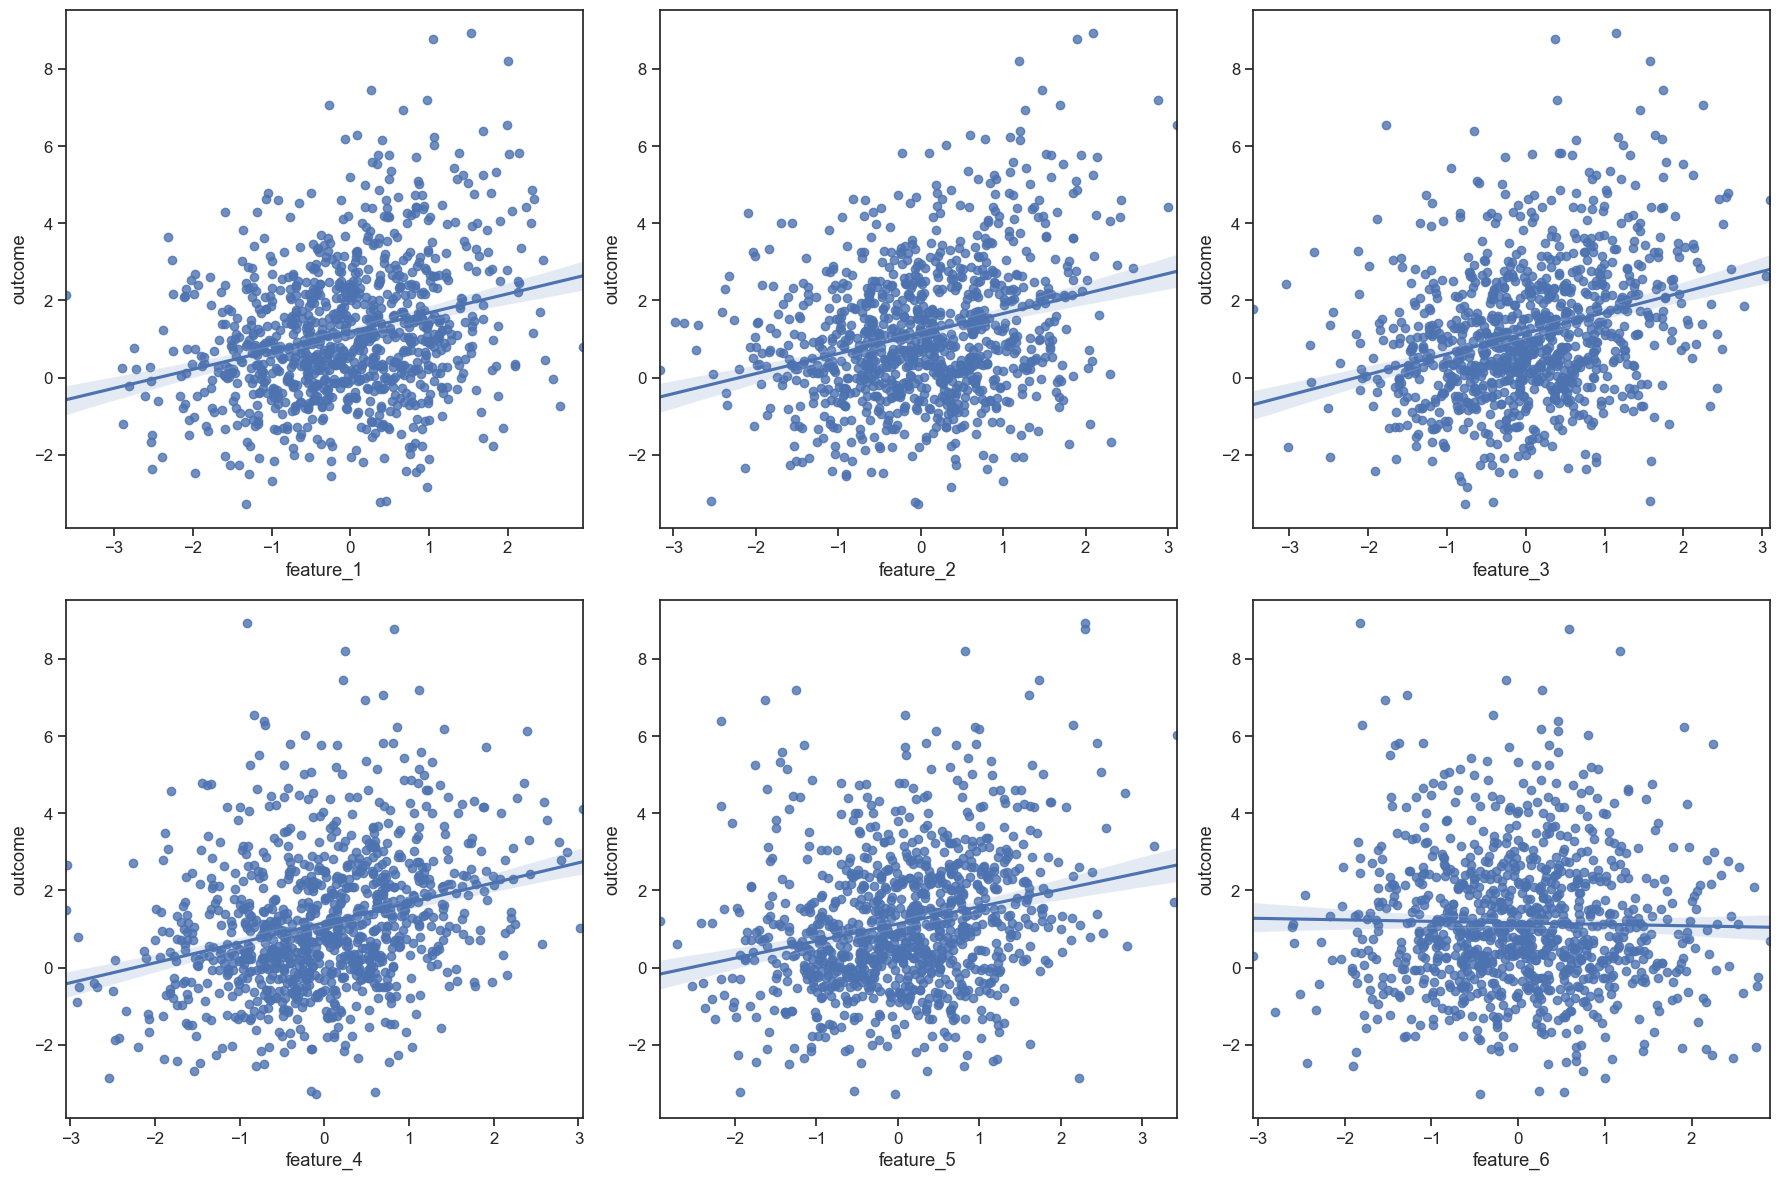

In [9]:
feature_cols = [col for col in data.columns if col.startswith('feature')]
n_cols = 3
n_rows = int(np.ceil(len(feature_cols) / n_cols))

sns.set(font_scale=1.1, style='ticks', rc={'figure.figsize':(18, n_rows*6)})
fig, axes = plt.subplots(n_rows, n_cols)

for i, col in enumerate(feature_cols):
    sns.regplot(data=data, x=col, y='outcome', ax=axes[i//n_cols, i%n_cols])

plt.tight_layout()

Distribution of each feature should be independent of the treatment:

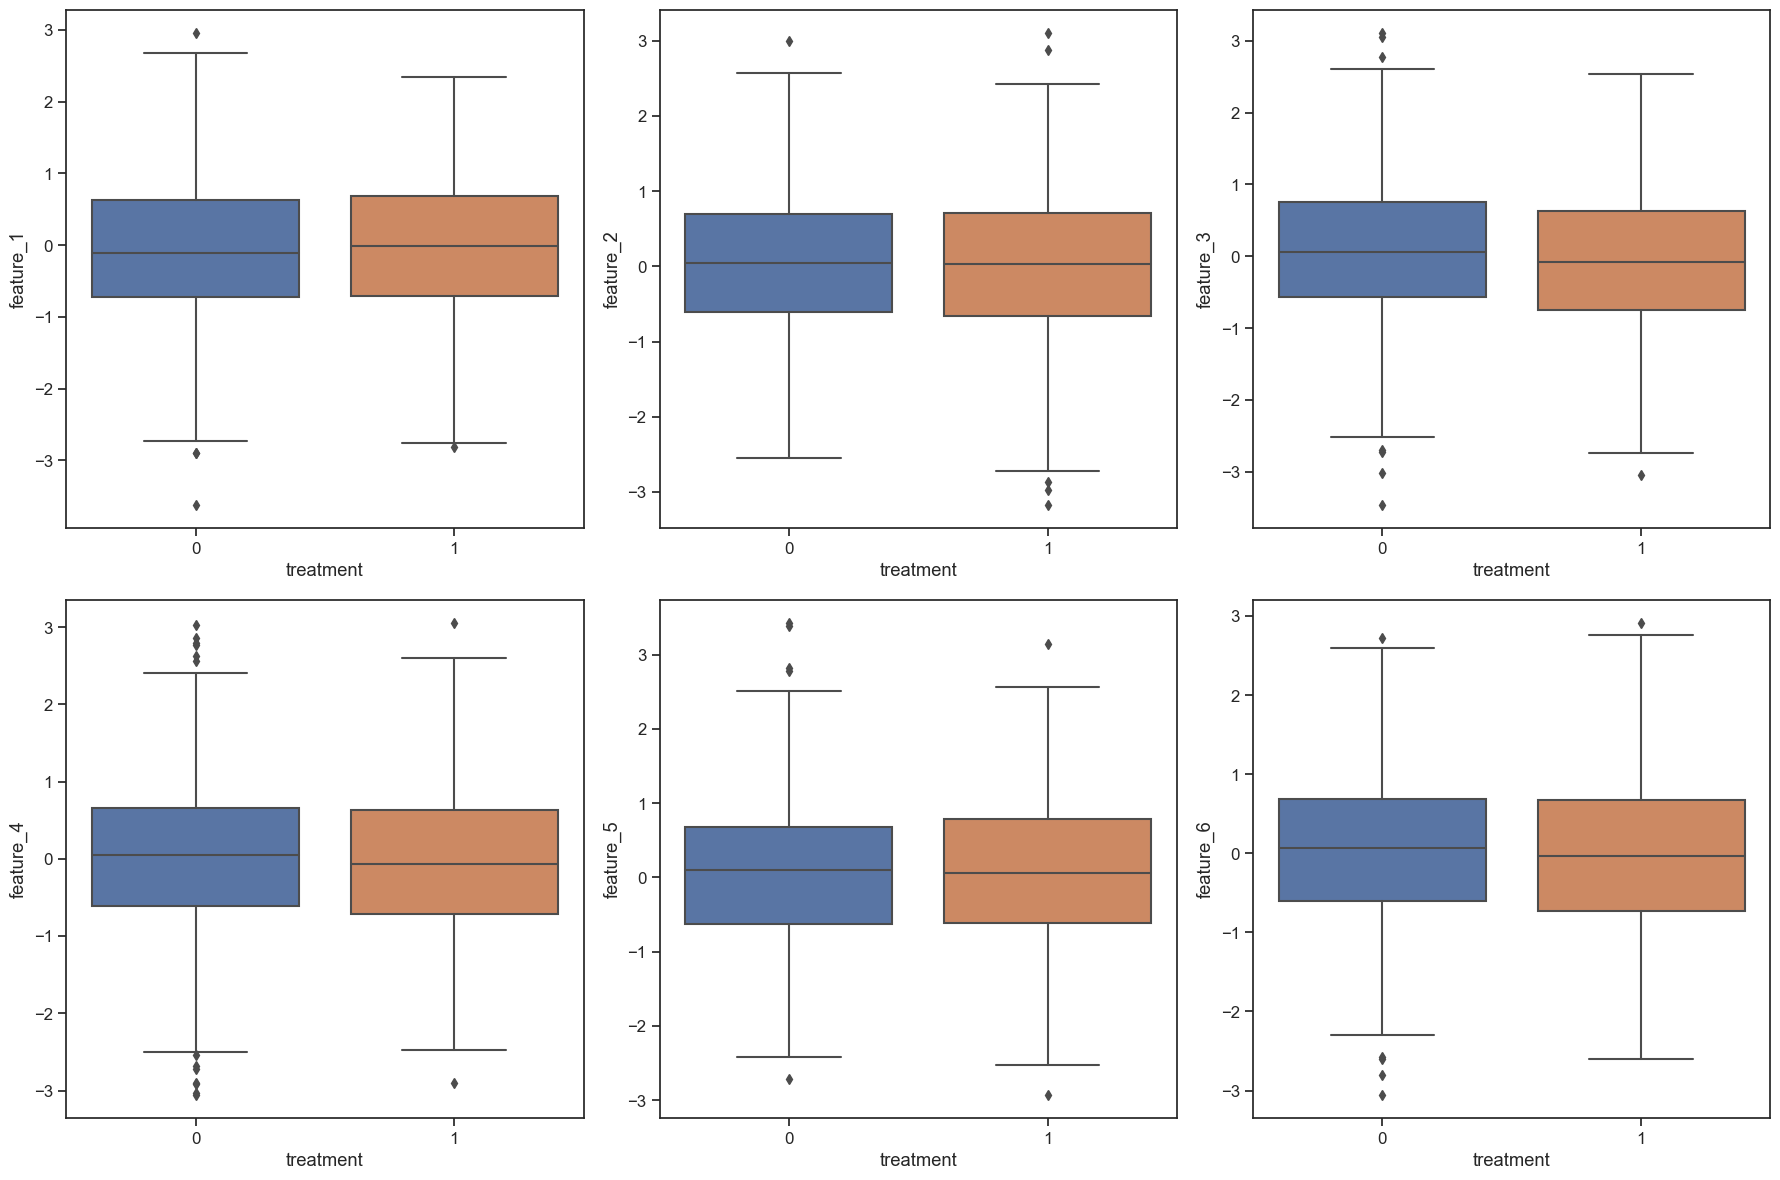

In [10]:
feature_cols = [col for col in data.columns if col.startswith('feature')]
n_cols = 3
n_rows = int(np.ceil(len(feature_cols) / n_cols))

sns.set(font_scale=1.1, style='ticks', rc={'figure.figsize':(18, n_rows*6)})
fig, axes = plt.subplots(n_rows, n_cols)

for i, col in enumerate(feature_cols):
    sns.boxplot(data=data, y=col, x='treatment', ax=axes[i//n_cols, i%n_cols])

plt.tight_layout()

Only the first two features should be correlated with the treatment effect:

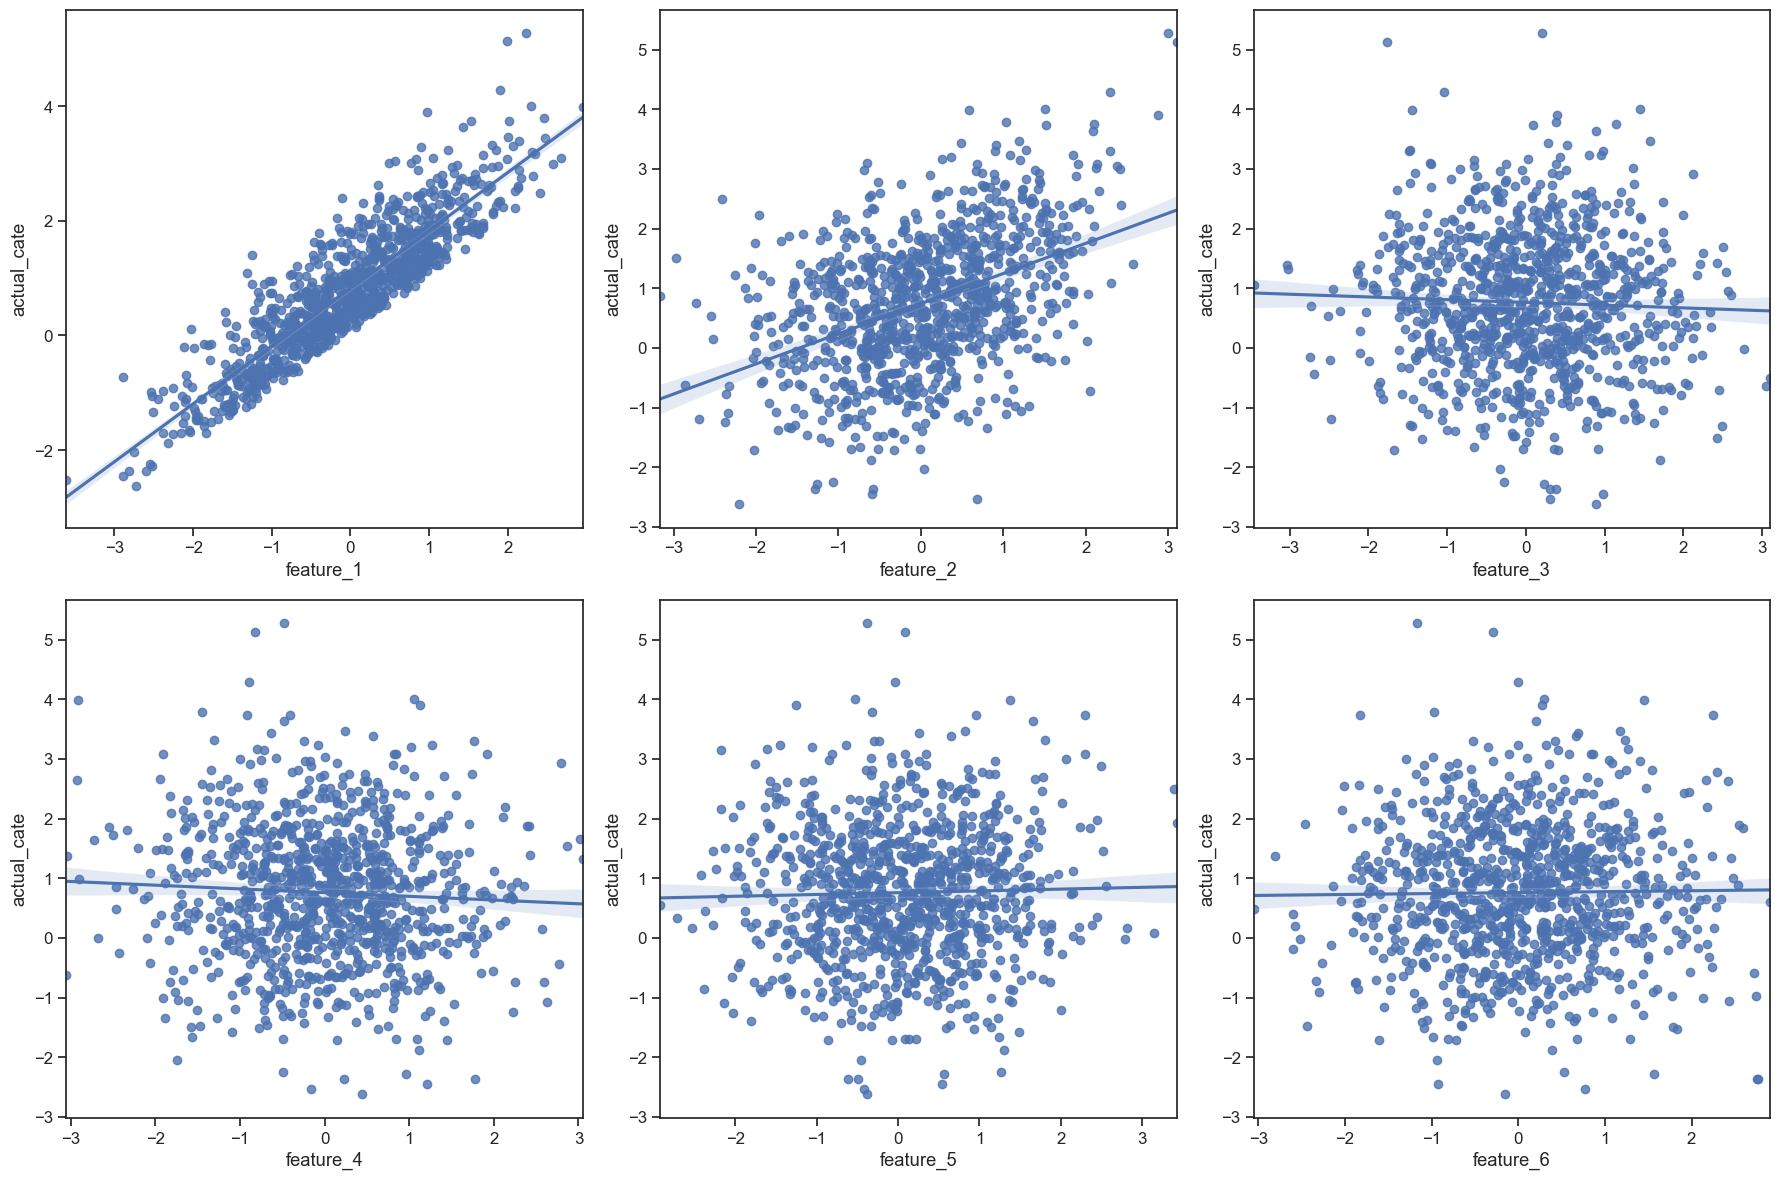

In [11]:
feature_cols = [col for col in data.columns if col.startswith('feature')]
n_cols = 3
n_rows = int(np.ceil(len(feature_cols) / n_cols))

sns.set(font_scale=1.1, style='ticks', rc={'figure.figsize':(18, n_rows*6)})
fig, axes = plt.subplots(n_rows, n_cols)

for i, col in enumerate(feature_cols):
    sns.regplot(data=data, x=col, y='actual_cate', ax=axes[i//n_cols, i%n_cols])

plt.tight_layout()

### Binary outcome

In [12]:
data = simulate_randomized_trial(n=10000, p=6, sigma=1.0, binary_outcome=True)

In [13]:
data.head()

,treatment,outcome,propensity,expected_outcome,actual_cate,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6
0,0,1,0.5,1.686211,-0.119211,-0.911429,0.580906,0.615737,0.622004,0.778993,-0.895260
1,1,1,0.5,1.881297,-0.172025,0.505350,0.222597,1.153349,-0.034130,-0.585703,1.571388
2,1,1,0.5,1.031873,0.447957,1.707248,-1.593878,0.918503,-1.208821,0.516843,-1.576469
3,1,1,0.5,1.908875,-0.144133,-1.653223,-1.038786,1.132689,0.680336,1.228539,0.758052
4,1,1,0.5,1.979660,-0.220009,0.060259,1.713881,0.205520,-0.316986,-2.480059,0.798826


In [14]:
data['outcome'].value_counts()

1    7524
0    2476
Name: outcome, dtype: int64

In [15]:
data[['treatment', 'outcome']].value_counts()

treatment  outcome
1          1          4014
0          1          3510
           0          1467
1          0          1009
dtype: int64

In [16]:
data['actual_cate'].describe()

count    10000.000000
mean         0.092287
std          0.284083
min         -0.893200
25%         -0.058022
50%          0.077146
75%          0.269431
max          0.885965
Name: actual_cate, dtype: float64

The first 5 features should affect the outcome:

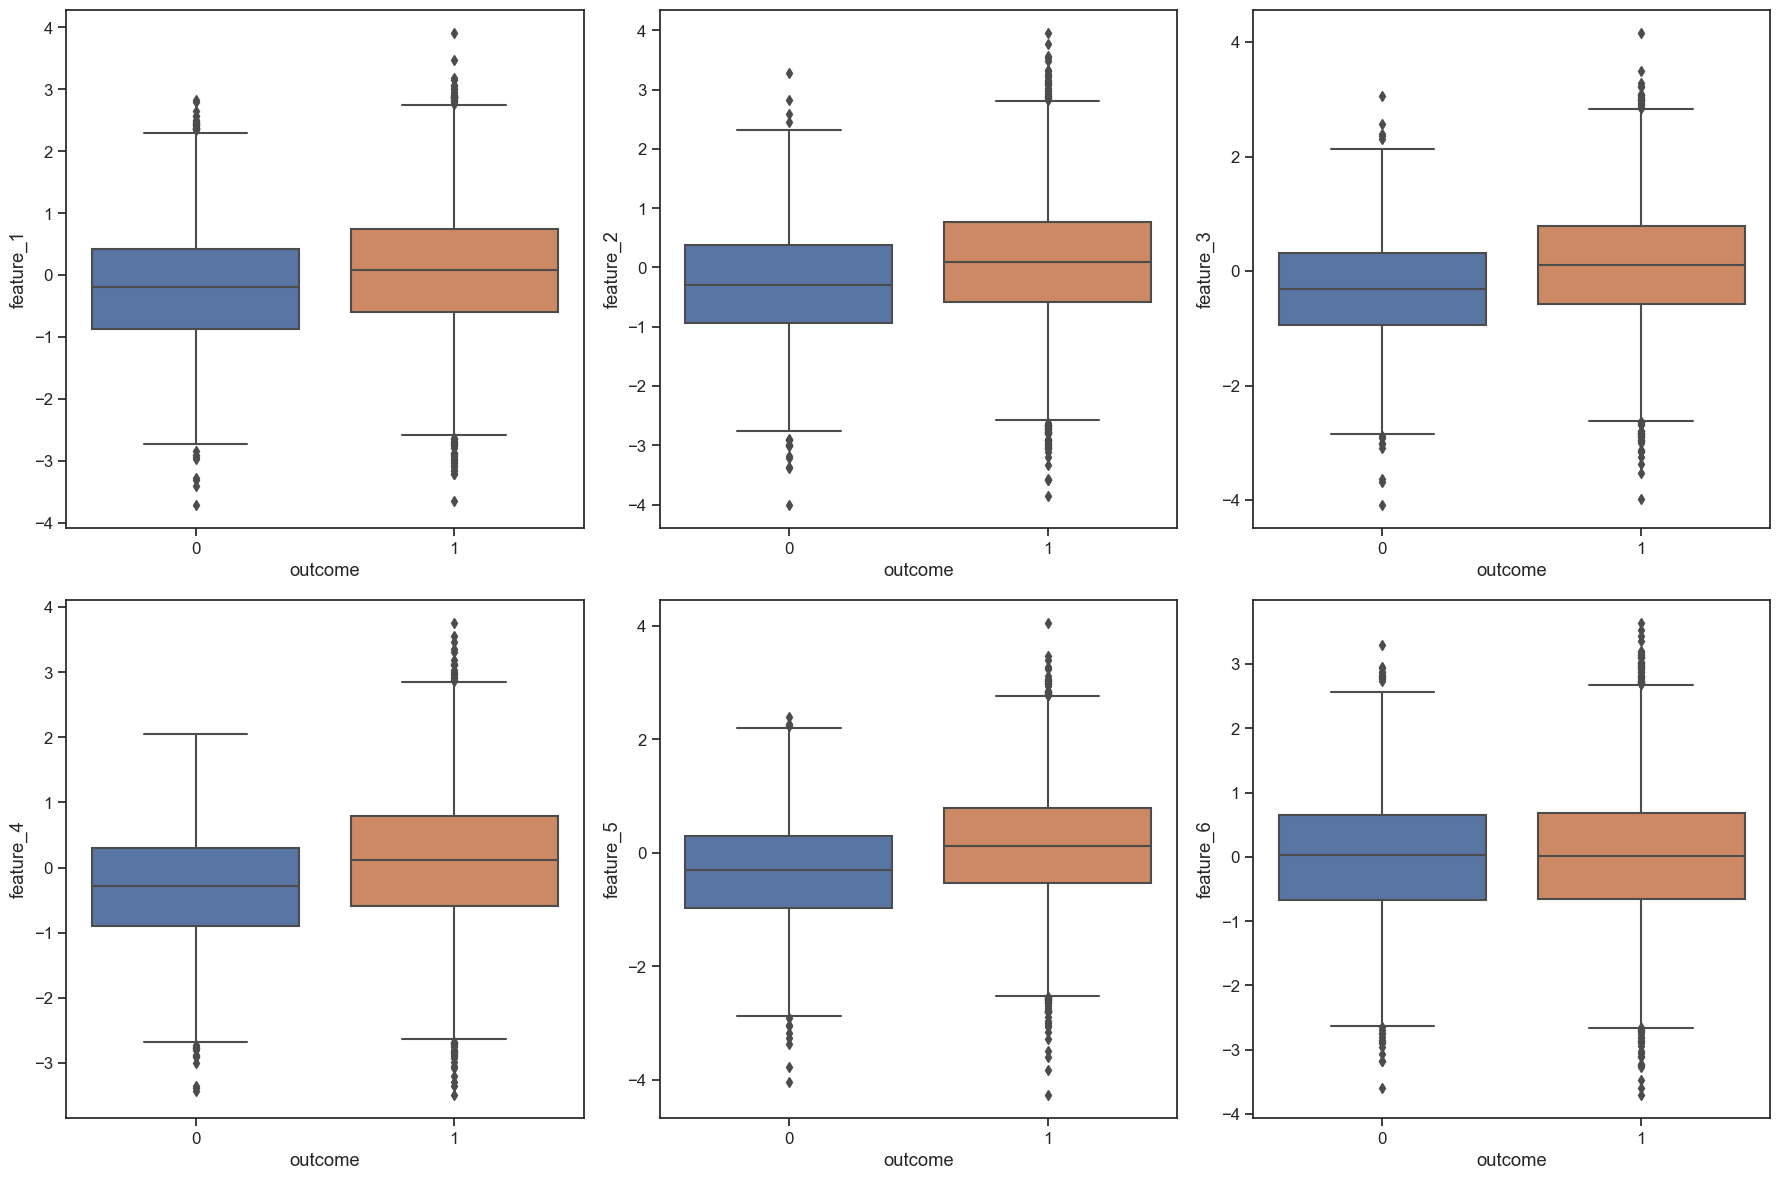

In [17]:
feature_cols = [col for col in data.columns if col.startswith('feature')]
n_cols = 3
n_rows = int(np.ceil(len(feature_cols) / n_cols))

sns.set(font_scale=1.1, style='ticks', rc={'figure.figsize':(18, n_rows*6)})
fig, axes = plt.subplots(n_rows, n_cols)

for i, col in enumerate(feature_cols):
    sns.boxplot(data=data, y=col, x='outcome', ax=axes[i//n_cols, i%n_cols])

plt.tight_layout()

The features should not affect the treatment:

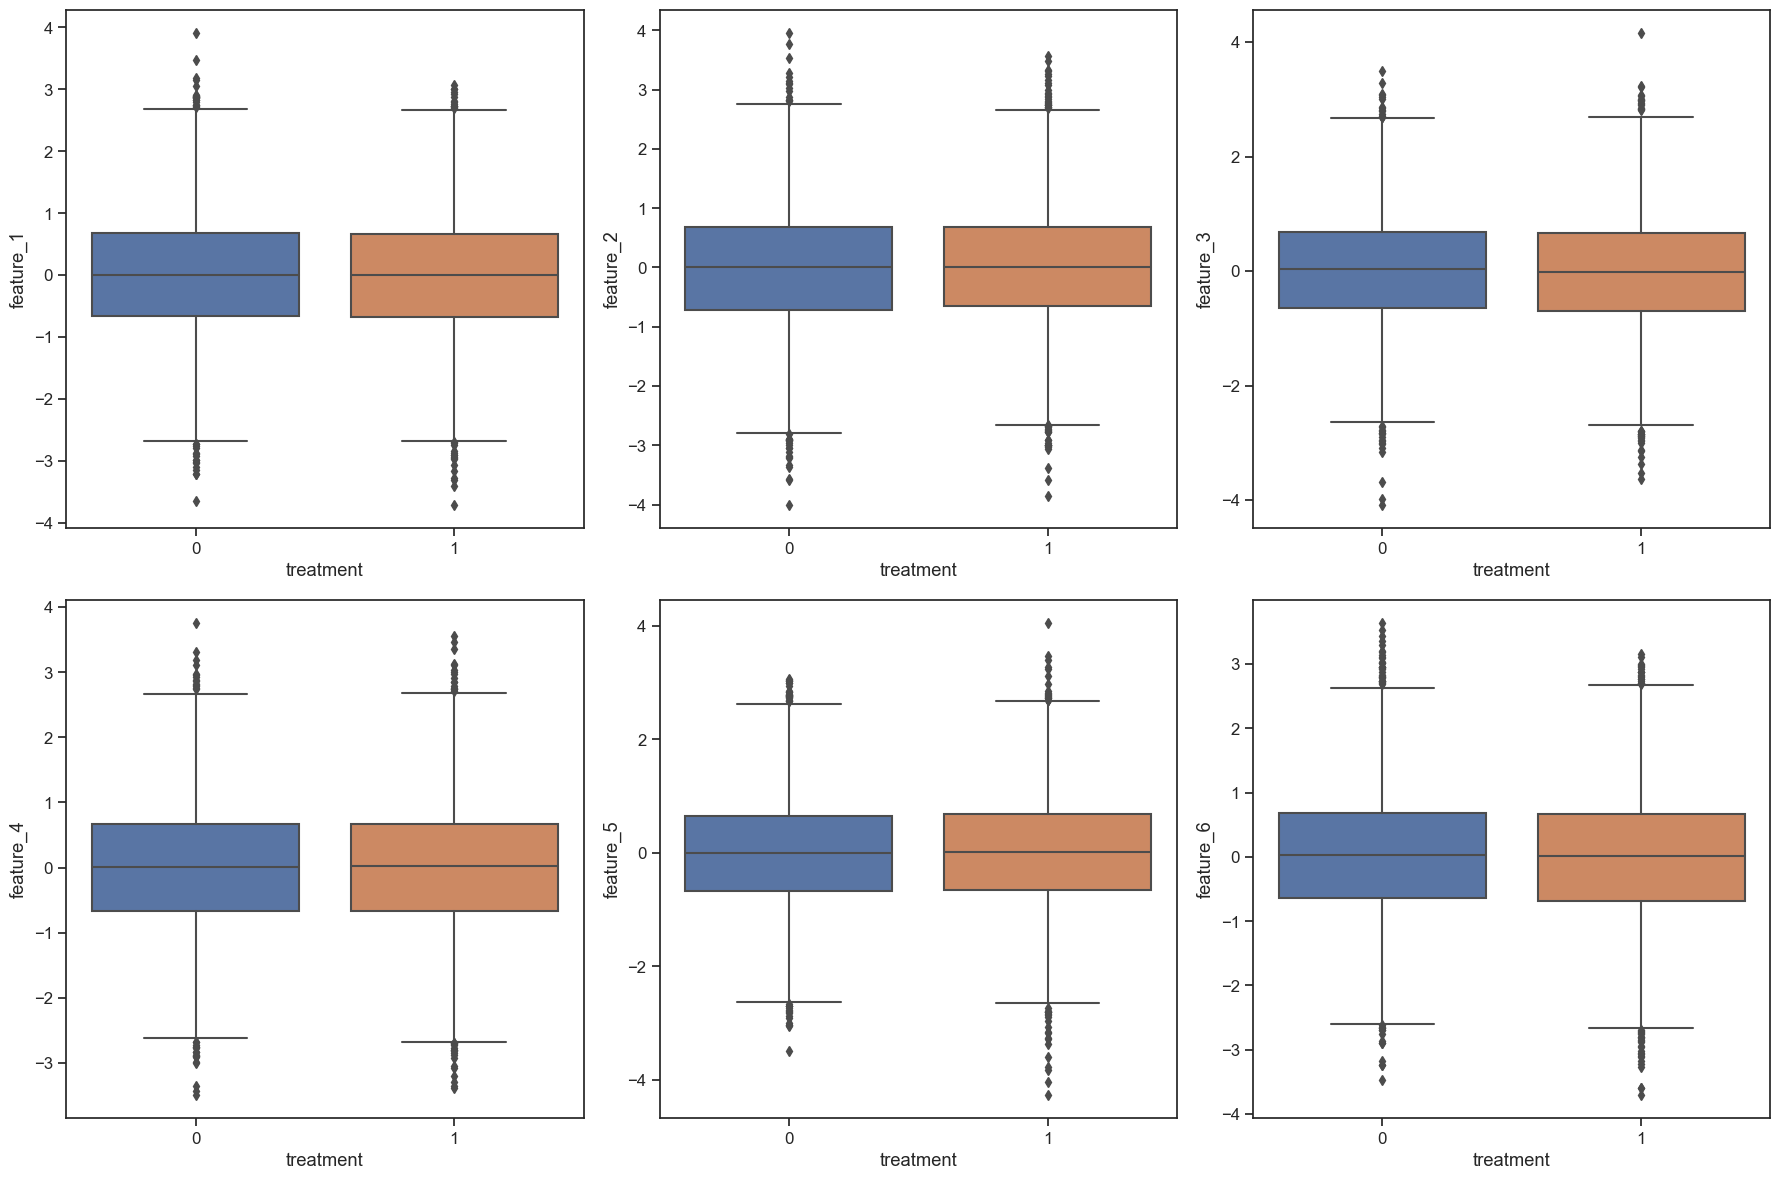

In [18]:
feature_cols = [col for col in data.columns if col.startswith('feature')]
n_cols = 3
n_rows = int(np.ceil(len(feature_cols) / n_cols))

sns.set(font_scale=1.1, style='ticks', rc={'figure.figsize':(18, n_rows*6)})
fig, axes = plt.subplots(n_rows, n_cols)

for i, col in enumerate(feature_cols):
    sns.boxplot(data=data, y=col, x='treatment', ax=axes[i//n_cols, i%n_cols])

plt.tight_layout()

Treatment effect should depend on the first two features:

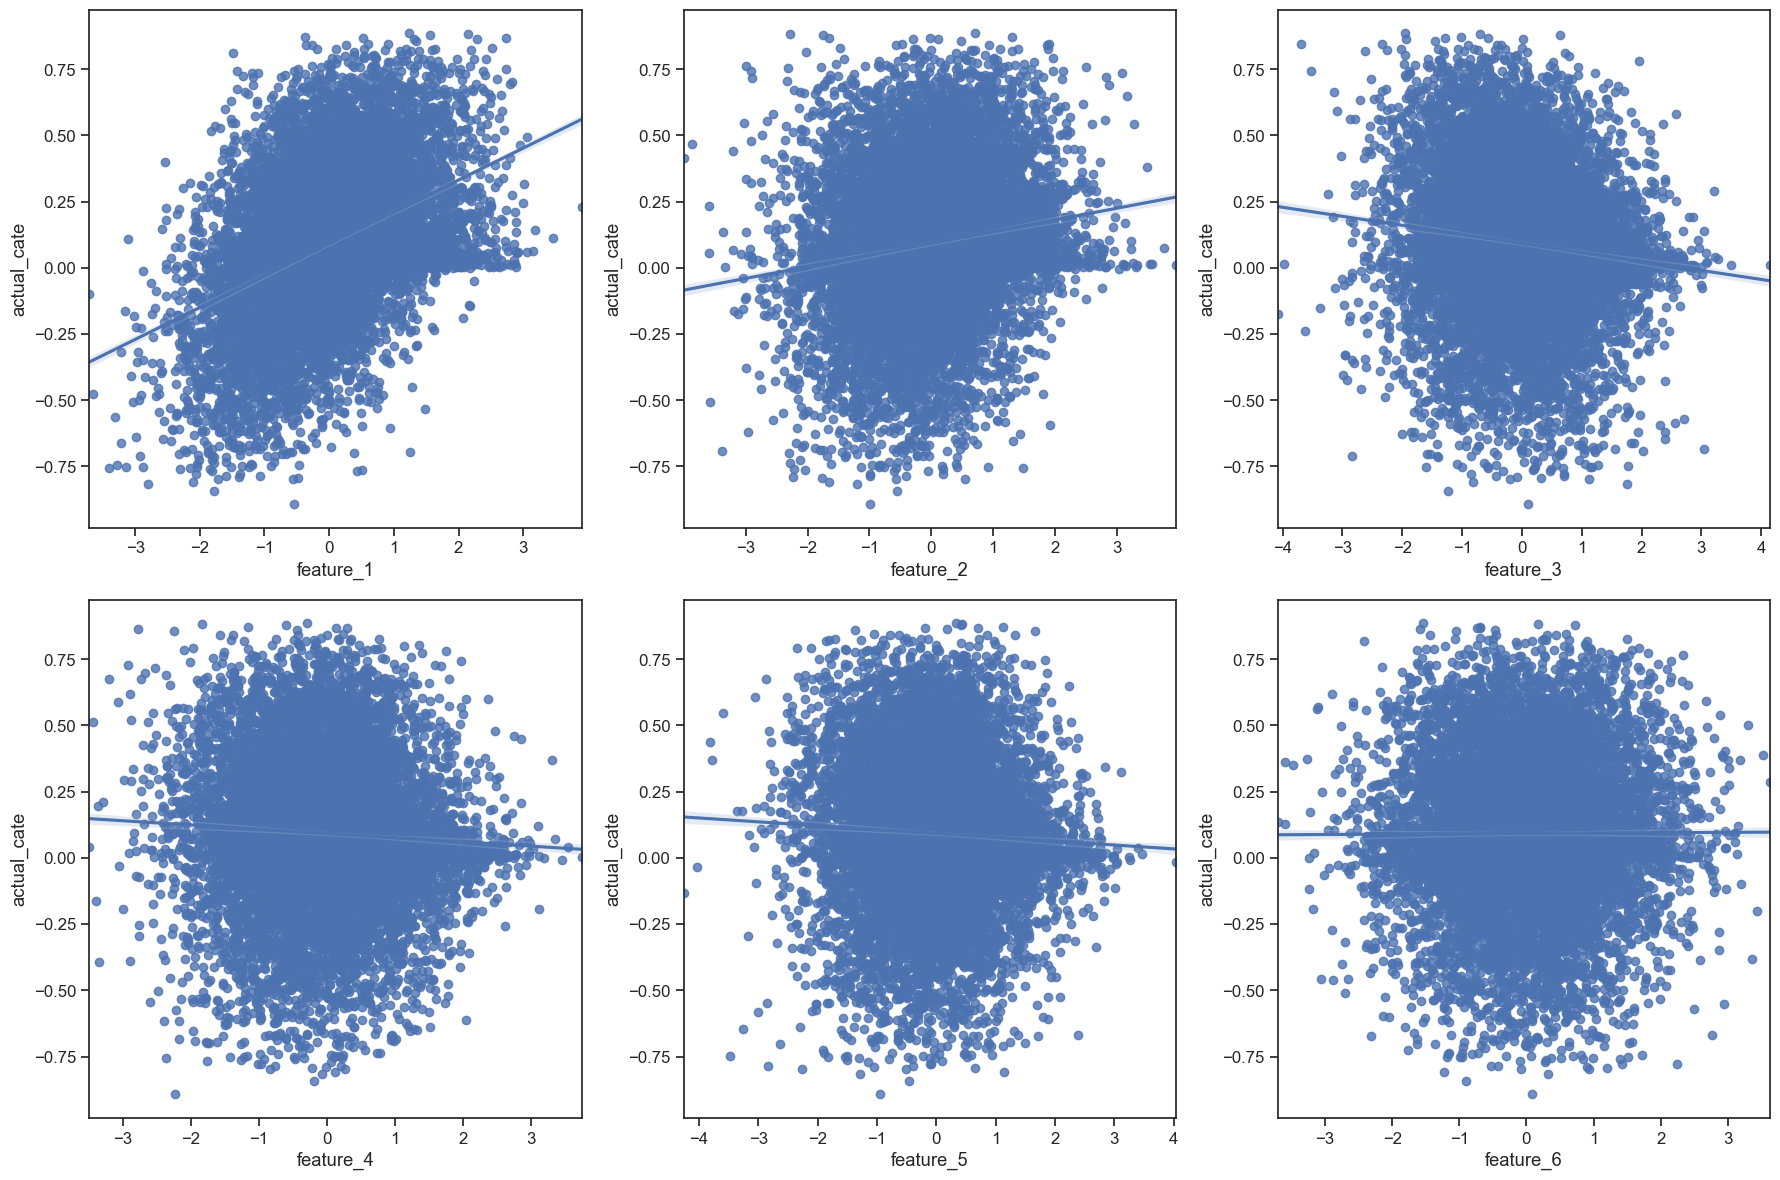

In [19]:
feature_cols = [col for col in data.columns if col.startswith('feature')]
n_cols = 3
n_rows = int(np.ceil(len(feature_cols) / n_cols))

sns.set(font_scale=1.1, style='ticks', rc={'figure.figsize':(18, n_rows*6)})
fig, axes = plt.subplots(n_rows, n_cols)

for i, col in enumerate(feature_cols):
    sns.regplot(data=data, x=col, y='actual_cate', ax=axes[i//n_cols, i%n_cols])

plt.tight_layout()